In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.randn(200,1)

In [ ]:
x.shape

(200, 1)

The array generated by np.random.rand(200,1) is multiplied by 6, scaling the random values to be between 0 and 6. Subtracting 3 then shifts the range to be between -3 and 3. So, x is a 200x1 array of random numbers uniformly distributed between -3 and 3.

In [ ]:
y.shape

(200, 1)

 This generates a 200x1 array of random numbers drawn from a standard normal distribution (mean = 0, standard deviation = 1).

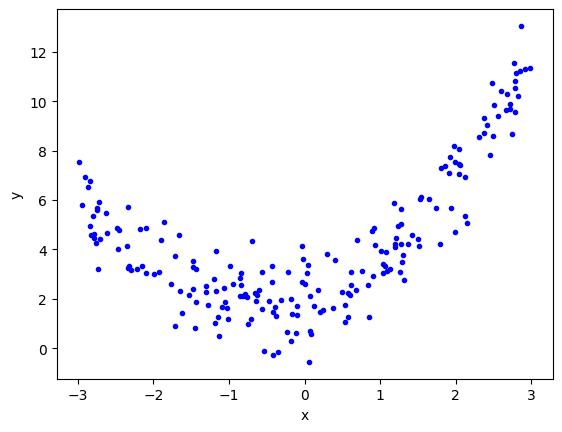

In [ ]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

train_test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

linear regression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.3042025751778036

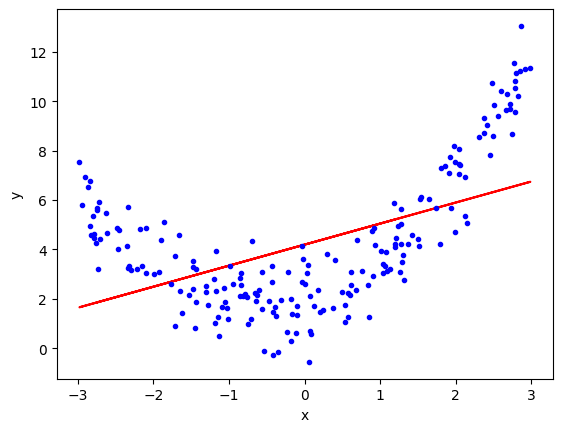

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='red')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
lr.intercept_

array([4.19613387])

In [ ]:
lr.coef_

array([[0.85220372]])

apply polynomial regression

In [ ]:
poly=PolynomialFeatures(degree=2)

In [ ]:
X_train_transform=poly.fit_transform(X_train)
X_test_transform=poly.fit_transform(X_test)

In [ ]:
print(X_train[0])
print(X_train_transform[0])

[1.19031311]
[1.         1.19031311 1.41684529]


In [ ]:
lrp=LinearRegression()

In [ ]:
lrp.fit(X_train_transform,y_train)

LinearRegression()

In [ ]:
y_pred=lrp.predict(X_test_transform)

In [ ]:
r2_score(y_test,y_pred)

0.8809538460413388

In [ ]:
lrp.intercept_

array([2.02351118])

In [ ]:
lrp.coef_

array([[0.        , 0.89124832, 0.77917827]])

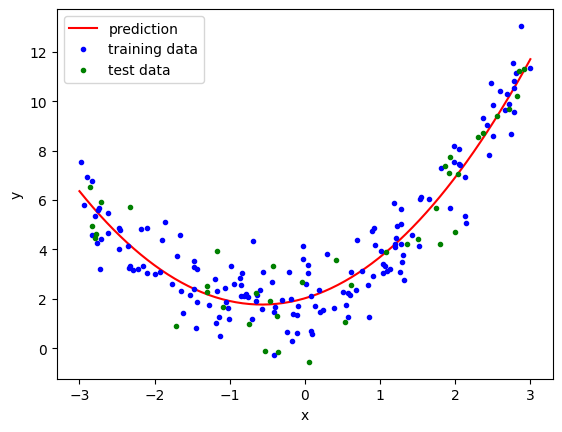

In [ ]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lrp.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',label='prediction')
plt.plot(X_train,y_train,'b.',label='training data')
plt.plot(X_test,y_test,'g.',label='test data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

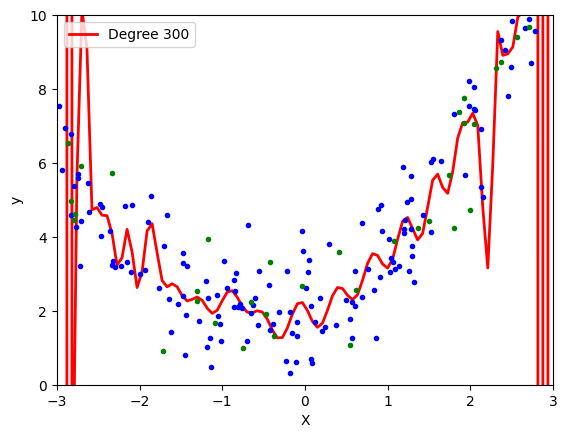

In [ ]:
polynomial_regression(300)

for multi col polynomial reg

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
!pip install --upgrade scikit-learn

import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [ ]:
X_multi_trans.shape

(100, 6)

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [ ]:
X_test_multi = poly.transform(final)

In [ ]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()